In [31]:
from nba_api.stats.endpoints import playergamelog



In [33]:
!pip install nba_api seaborn matplotlib pandas



In [34]:
!import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog


zsh:1: command not found: import


In [35]:
# Get all NBA teams
nba_teams = teams.get_teams()

# Print the first few teams
for team in nba_teams[:5]:
    print(team)


{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', 'nickname': 'Hawks', 'city': 'Atlanta', 'state': 'Georgia', 'year_founded': 1949}
{'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}
{'id': 1610612739, 'full_name': 'Cleveland Cavaliers', 'abbreviation': 'CLE', 'nickname': 'Cavaliers', 'city': 'Cleveland', 'state': 'Ohio', 'year_founded': 1970}
{'id': 1610612740, 'full_name': 'New Orleans Pelicans', 'abbreviation': 'NOP', 'nickname': 'Pelicans', 'city': 'New Orleans', 'state': 'Louisiana', 'year_founded': 2002}
{'id': 1610612741, 'full_name': 'Chicago Bulls', 'abbreviation': 'CHI', 'nickname': 'Bulls', 'city': 'Chicago', 'state': 'Illinois', 'year_founded': 1966}


In [39]:
# Find LeBron James' player ID
player = players.find_players_by_full_name("LeBron James")[0]
player_id = player['id']
print(f"LeBron James' Player ID: {player_id}")


LeBron James' Player ID: 2544


In [41]:
# Get game data for LeBron James (player_id) for the 2020-21 season
game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2020-21")
games = game_log.get_data_frames()[0]

# Display the first few rows of the data
games.head()


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22020,2544,0022001072,"MAY 16, 2021",LAL @ NOP,W,27,11,22,0.500,...,0,1,6,3,0,2,0,25,-2,1
1,22020,2544,0022001061,"MAY 15, 2021",LAL @ IND,W,28,11,22,0.500,...,4,7,8,0,0,4,2,24,7,1
2,22020,2544,0022000974,"MAY 02, 2021",LAL vs. TOR,L,28,6,11,0.545,...,7,7,6,0,0,5,2,19,-4,1
3,22020,2544,0022000956,"APR 30, 2021",LAL vs. SAC,L,32,6,12,0.500,...,7,8,7,2,1,5,1,16,5,1
4,22020,2544,0022000640,"MAR 20, 2021",LAL vs. ATL,L,11,3,6,0.500,...,1,1,4,0,0,1,0,10,-5,1


In [45]:
# Create a pivot table with game date as the index and opponent as columns
games_pivot = games.pivot_table(index='GAME_DATE', columns='MATCHUP', values='PTS')

# Display the pivot table
games_pivot.head()


MATCHUP,LAL @ ATL,LAL @ BOS,LAL @ CHI,LAL @ CLE,LAL @ DEN,LAL @ DET,LAL @ GSW,LAL @ HOU,LAL @ IND,LAL @ MEM,...,LAL vs. MIA,LAL vs. MIN,LAL vs. NOP,LAL vs. OKC,LAL vs. PHX,LAL vs. POR,LAL vs. SAC,LAL vs. SAS,LAL vs. TOR,LAL vs. WAS
GAME_DATE,,,,,,,,,,,,,,,,,,,,,
"APR 30, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN
"DEC 22, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"DEC 25, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"DEC 27, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"DEC 28, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN


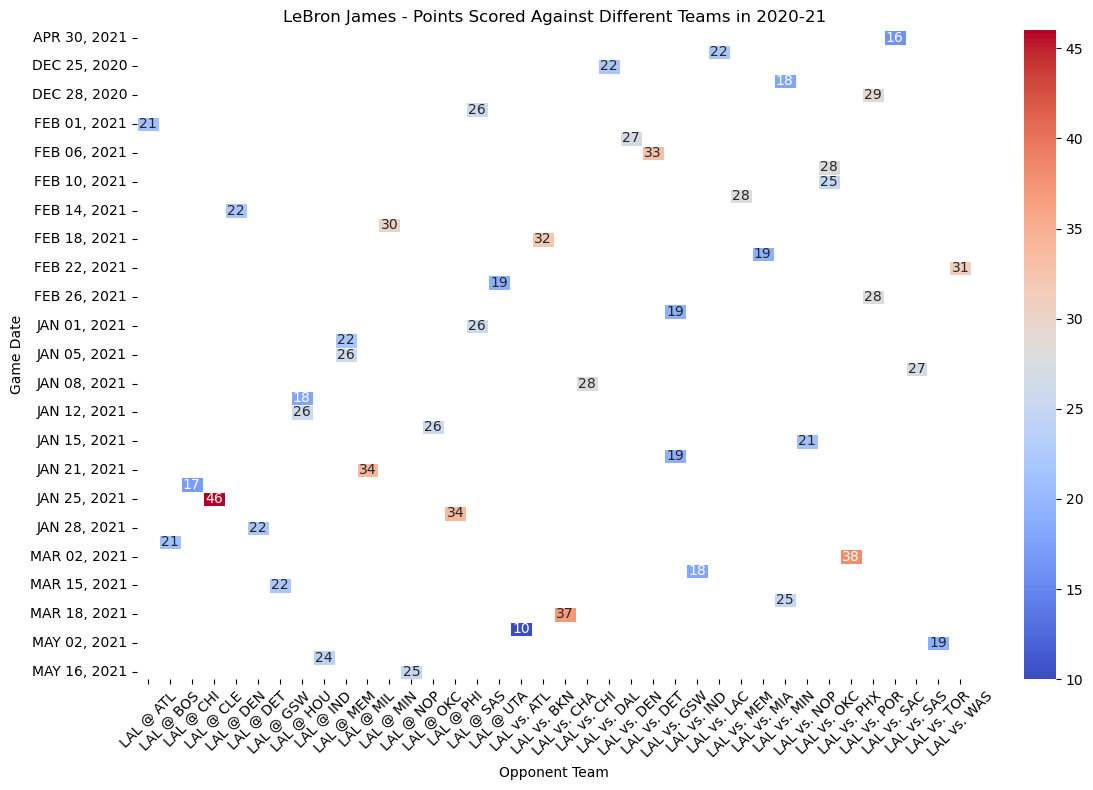

In [47]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(games_pivot, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)

# Add title and labels
plt.title("LeBron James - Points Scored Against Different Teams in 2020-21")
plt.xlabel("Opponent Team")
plt.ylabel("Game Date")
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures that the plot elements fit well

# Show the plot
plt.show()
